MACHINE LEARNING PROJECT DONE BY MAUZUM SHAMIL

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv(r"C:\Users\dell\Desktop\DATASETS\Malware_Detection_Data.csv")

# EDA

In [169]:
df

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,3651,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,3651,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,3651,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,3651,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0


In [170]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [171]:
df.dtypes

hash                 object
millisecond           int64
classification       object
state                 int64
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
policy                int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
cached_hole_size      int64
free_area_cache       int64
mm_users              int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
end_data              int64
last_interval         int64
nvcsw                 int64
nivcsw                int64
min_flt               int64
maj_flt               int64
fs_excl_counter       int64
lock                  int64
utime                 int64
stime                 int64
gtime                 int64
cgtime                int64
signal_nvcsw          int64
dtype: object

In [172]:
df.nunique()

hash                   100
millisecond           1000
classification           2
state                  304
usage_counter            1
prio                    85
static_prio            271
normal_prio              1
policy                   1
vm_pgoff                 1
vm_truncate_count     2813
task_size                1
cached_hole_size         1
free_area_cache        310
mm_users               373
map_count            10578
hiwater_rss              1
total_vm              1850
shared_vm                3
exec_vm                105
reserved_vm            725
nr_ptes                  1
end_data                 3
last_interval           67
nvcsw                 3994
nivcsw                 150
min_flt                  5
maj_flt                  3
fs_excl_counter         12
lock                     1
utime                 5547
stime                    5
gtime                   16
cgtime                   1
signal_nvcsw             1
dtype: int64

In [173]:
# null values
df.isna().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [174]:
# label encoding
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [175]:
df.nunique()

hash                   100
millisecond           1000
classification           2
state                  304
usage_counter            1
prio                    85
static_prio            271
normal_prio              1
policy                   1
vm_pgoff                 1
vm_truncate_count     2813
task_size                1
cached_hole_size         1
free_area_cache        310
mm_users               373
map_count            10578
hiwater_rss              1
total_vm              1850
shared_vm                3
exec_vm                105
reserved_vm            725
nr_ptes                  1
end_data                 3
last_interval           67
nvcsw                 3994
nivcsw                 150
min_flt                  5
maj_flt                  3
fs_excl_counter         12
lock                     1
utime                 5547
stime                    5
gtime                   16
cgtime                   1
signal_nvcsw             1
dtype: int64

In [176]:
df.drop('hash',axis=1,inplace=True)

In [177]:
df.map_count.nunique()

10578

In [178]:
df.drop('map_count',axis=1,inplace=True)

In [179]:
df.dtypes

millisecond           int64
classification       object
state                 int64
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
policy                int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
cached_hole_size      int64
free_area_cache       int64
mm_users              int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
end_data              int64
last_interval         int64
nvcsw                 int64
nivcsw                int64
min_flt               int64
maj_flt               int64
fs_excl_counter       int64
lock                  int64
utime                 int64
stime                 int64
gtime                 int64
cgtime                int64
signal_nvcsw          int64
dtype: object

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [181]:
df['classification'] = le.fit_transform(df['classification'])

In [182]:
df.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [183]:
df.tail()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,995,1,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99996,996,1,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99997,997,1,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99998,998,1,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0
99999,999,1,4096,0,3070148608,13988,0,0,0,10406,0,0,0,616,0,40,120,97,90,0,120,0,337688,2,1,120,0,3204448256,371979,3,0,0,0


In [184]:
df.drop('millisecond',axis=1,inplace=True)

In [185]:
df.head()

,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [186]:
x = df.drop('classification',axis=1)
y = df['classification']

In [187]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [188]:
x.head()

,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0


In [189]:
pd.set_option('display.max_columns', None)
print(df)

       classification  state  usage_counter        prio  static_prio  \
0                   1      0              0  3069378560        14274   
1                   1      0              0  3069378560        14274   
2                   1      0              0  3069378560        14274   
3                   1      0              0  3069378560        14274   
4                   1      0              0  3069378560        14274   
...               ...    ...            ...         ...          ...   
99995               1   4096              0  3070148608        13988   
99996               1   4096              0  3070148608        13988   
99997               1   4096              0  3070148608        13988   
99998               1   4096              0  3070148608        13988   
99999               1   4096              0  3070148608        13988   

       normal_prio  policy  vm_pgoff  vm_truncate_count  task_size  \
0                0       0         0              13173          

In [190]:
newx = minmax.fit_transform(x)

In [191]:
df.columns

Index(['classification', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'hiwater_rss',
       'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes',
       'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt', 'maj_flt',
       'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime', 'cgtime',
       'signal_nvcsw'],
      dtype='object')

In [192]:
x = pd.DataFrame(newx,columns=['state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'hiwater_rss',
       'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes',
       'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt', 'maj_flt',
       'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime', 'cgtime',
       'signal_nvcsw'])

In [193]:
df = pd.concat([x,y],axis=1)

In [194]:
df.head()

,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,classification
0,0.0,0.0,0.18254,0.016007,0.0,0.0,0.0,0.199175,0.0,0.0,0.046602,0.292428,0.0,0.052031,1.0,0.307692,0.249311,0.0,1.0,0.364581,0.091519,0.0,0.0,1.0,0.0,0.0,0.177694,0.25,0.0,0.0,0.0,1
1,0.0,0.0,0.18254,0.016007,0.0,0.0,0.0,0.199175,0.0,0.0,0.046602,0.292428,0.0,0.052031,1.0,0.307692,0.249311,0.0,1.0,0.364581,0.091519,0.0,0.0,1.0,0.0,0.0,0.177694,0.25,0.0,0.0,0.0,1
2,0.0,0.0,0.18254,0.016007,0.0,0.0,0.0,0.199175,0.0,0.0,0.046602,0.292428,0.0,0.052031,1.0,0.307692,0.249311,0.0,1.0,0.364581,0.091519,0.0,0.0,1.0,0.0,0.0,0.177694,0.25,0.0,0.0,0.0,1
3,0.0,0.0,0.18254,0.016007,0.0,0.0,0.0,0.199175,0.0,0.0,0.046602,0.292428,0.0,0.052031,1.0,0.307692,0.249311,0.0,1.0,0.364581,0.091519,0.0,0.0,1.0,0.0,0.0,0.177694,0.25,0.0,0.0,0.0,1
4,0.0,0.0,0.18254,0.016007,0.0,0.0,0.0,0.199175,0.0,0.0,0.046602,0.292428,0.0,0.052031,1.0,0.307692,0.249311,0.0,1.0,0.364581,0.091519,0.0,0.0,1.0,0.0,0.0,0.177694,0.25,0.0,0.0,0.0,1


# MACHINE LEARNING ALGORITHMS

In [195]:
x = df.drop('classification',axis=1)
x1 = pd.DataFrame(x)
y = df['classification']
y1 = pd.DataFrame(y)

In [196]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [197]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [199]:
model1 = lr.fit(x1_train,y1_train)
y1_pred1 = model1.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
print("the acc score of model logistic regression is:", accuracy_score(y1_test,y1_pred1))

the acc score of model logistic regression is: 0.9333


In [201]:
model1.predict([[0.0,	0.0,	0.18254,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.0,	0.0,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# KNNeighbors algorithm

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

metric_k = []
neighbors = np.arange(3, 14)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    model2 = knn.fit(x1_train, y1_train)
    # Convert DataFrame to numpy array
    x1_test_array = x1_test.values
    y1_predknn = model2.predict(x1_test_array)
    acc = accuracy_score(y1_test, y1_predknn)
    metric_k.append(acc)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarn

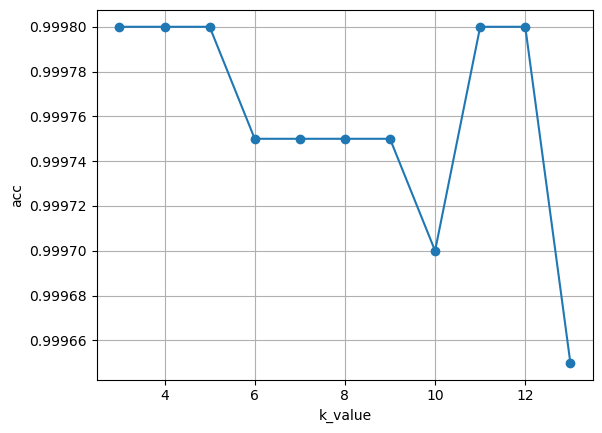

In [203]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('acc')
plt.grid()

In [204]:
# accuracy more on point 12 so taking it as a k and creating a model using k=12

knn =KNeighborsClassifier(n_neighbors=12)
model2 = knn.fit(x1_train,y1_train)
y1_predknn = model2.predict(x1_test_array)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [205]:
print("the acc score of knneighbor model is:", accuracy_score(y1_test,y1_predknn))

the acc score of knneighbor model is: 0.9998


In [206]:
model2.predict([[0.0,	0.0,	0.18254,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.0,	0.0,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

# SVM ALGORITHM

In [207]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
model3 = svm.fit(x1_train,y1_train)
y1_predsvm = model3.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [208]:
print("the acc score of SVM model is :", accuracy_score(y1_test,y1_predsvm))

the acc score of SVM model is : 0.9863


In [209]:
model3.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

# DECISION TREE

In [210]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42)
model4 = DTC.fit(x1_train,y1_train)
y1_predDT = model4.predict(x1_test)

In [211]:
print("the acc score of decision tree is :", accuracy_score(y1_test,y1_predDT))

the acc score of decision tree is : 1.0


In [212]:
model4.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#RANDOM FOREST

In [213]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
model5 = RFC.fit(x1_train,y1_train)
y1_predRF = model5.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [214]:
print("the acc score of random forest model is :", accuracy_score(y1_test,y1_predRF))

the acc score of random forest model is : 1.0


In [215]:
model5.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

#naive bayes

In [216]:
# GAUSSIEN

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
model61 = GNB.fit(x1_train,y1_train)
y1_predGnb= model61.predict(x1_test)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [217]:
print("the acc score of gaussian naive bayes is:", accuracy_score(y1_test,y1_predGnb))

the acc score of gaussian naive bayes is: 0.6956


In [218]:
model61.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [219]:
# multinomial

from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
model62 = MNB.fit(x1_train,y1_train)
y1_predMnb = model62.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
print("the acc score of multinomial naive bayes is:", accuracy_score(y1_test,y1_predMnb))

the acc score of multinomial naive bayes is: 0.67975


In [221]:
model62.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1])

In [222]:
# bernoulli

from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
model63 = BNB.fit(x1_train,y1_train)
y1_predBnb = model63.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
print("the acc score of bernoulli naive bayes is :", accuracy_score(y1_test,y1_predBnb))

the acc score of bernoulli naive bayes is : 0.67135


In [224]:
model63.predict([[0.000000,	0.0,	0.182540,	0.016007,	0.0,	0.0,	0.0,	0.199175,	0.0,	0.0,	0.046602,	0.292428,	0.0,	0.052031,	1.0,	0.307692,	0.249311,	0.0,	1.0,	0.364581,	0.091519,	0.000000,	0.000000,	1.0,	0.0,	0.0,	0.177694,	0.25,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])

In [225]:
model63.predict([[0.000095,	0.0,	0.928571,	0.0,	0.0,	0.0,	0.0,	0.040717,	0.0,	0.0,	0.0,	0.010444,	0.0,	0.01283,	1.0,	0.048077,	0.084022,	0.0,	1.0,	0.0,	0.0,	0.005479,	0.003906,	1.0,	0.0,	0.0,	0.00393,	0.0,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([1])

#BOOSTING MODEL

In [226]:
# ADABOOST

from sklearn.ensemble import AdaBoostClassifier
ABC =AdaBoostClassifier()
model71 = ABC.fit(x1_train,y1_train)
y1_predadb = model71.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
print("the acc score of adaboost is:", accuracy_score(y1_test,y1_predadb))

the acc score of adaboost is: 0.9998


In [228]:
model71.predict([[0.000095,	0.0,	0.928571,	0.0,	0.0,	0.0,	0.0,	0.040717,	0.0,	0.0,	0.0,	0.010444,	0.0,	0.01283,	1.0,	0.048077,	0.084022,	0.0,	1.0,	0.0,	0.0,	0.005479,	0.003906,	1.0,	0.0,	0.0,	0.00393,	0.0,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1])

In [229]:
# GRADIENT BOOST

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
model72 = GBC.fit(x1_train,y1_train)
y1_predgbc = model72.predict(x1_test)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
print("the acc score of gradient boostong is:", accuracy_score(y1_test,y1_predgbc))

the acc score of gradient boostong is: 0.99975


In [231]:
model72.predict([[0.000095,	0.0,	0.928571,	0.0,	0.0,	0.0,	0.0,	0.040717,	0.0,	0.0,	0.0,	0.010444,	0.0,	0.01283,	1.0,	0.048077,	0.084022,	0.0,	1.0,	0.0,	0.0,	0.005479,	0.003906,	1.0,	0.0,	0.0,	0.00393,	0.0,	0.0,	0.0,	0.0]])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [232]:
# XGBOOST
!pip install xgboost

In [233]:
from xgboost import XGBClassifier
Xgbc = XGBClassifier()
model73 = Xgbc.fit(x1_train,y1_train)
y1_predxgb = model73.predict(x1_test)

In [234]:
print("the acc score od xgboost is:", accuracy_score(y1_test,y1_predxgb))

the acc score od xgboost is: 1.0


In [235]:
model73.predict([[0.000095,	0.0,	0.928571,	0.0,	0.0,	0.0,	0.0,	0.040717,	0.0,	0.0,	0.0,	0.010444,	0.0,	0.01283,	1.0,	0.048077,	0.084022,	0.0,	1.0,	0.0,	0.0,	0.005479,	0.003906,	1.0,	0.0,	0.0,	0.00393,	0.0,	0.0,	0.0,	0.0]])

array([1])

# result and conclusion

**keywords**


* model1 - logistic regression
* model2 - knneighbors
* model3 - svm
* model4 - Decision tree
* model5 - random forest
* model61 - gaussian
* model62 - multinomial
* model63 - bernoulli
* model71 - adaboost
* model72 - gradient
* model73 - xgboost
















**accuracy scores**

*  logistic regression -0.9333
*  knneighbors         -0.9998
*  svm                 -0.9863
*  Decision tree       -1.0
*  random forest       -1.0
*  gaussian            -0.6956
*  multinomial         -0.67975
*  bernoulli           -0.67135
*  adaboost            -0.9998
*  gradient            -0.99975
*  xgboost             -1.0

Among these algorithms-Decision tree,Random forest and XGBoost achieved the highest accuracy score of 0.90, indicating its superiority in accurately predicting the target variable in the given dataset.



**Conclusion**:
In conclusion, this project demonstrated the effectiveness of various classification algorithms in predicting the target variable. Decision tree,Random forest and XGBoost outperformed the other algorithms with the highest accuracy score of 1.00. Therefore, for this particular dataset, Decision tree,Random forest and XGBoost is recommended as the algorithms of choice for achieving the most accurate predictions.